In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('../data/shrimp_dataset.csv')

In [3]:
data.head(3)

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
0,22/06/19,2,-1,100.00 %,780000.0,0.18,140.4,0.0,NaN,NaN
1,23/06/19,2,1,98.00 %,764400.0,0.18,137.6,15.0,NW 38 % # 3,Boleo
2,24/06/19,2,2,97.75 %,762450.0,0.24,183.0,35.0,NW 38 % # 3,Boleo


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
date                          955 non-null object
pool_id                       955 non-null int64
day                           955 non-null int64
shrimp_survival_proportion    955 non-null object
shrimp_population             955 non-null float64
shrimp_grown                  952 non-null float64
shrimp_biomass                955 non-null float64
food_amount                   954 non-null float64
food_type                     945 non-null object
feeder_type                   945 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 74.7+ KB


- Quitar símbolo '%' de los valores de 'shrimp_survival_proportion' y acotarlos entre 0 y 1.

- Convertir columna 'date' de tipo 'object' a 'datetime'.

In [5]:
data.shrimp_survival_proportion = pd.to_numeric(data.shrimp_survival_proportion.str[:-2])/100
data.date = pd.to_datetime(data.date, format='%d/%m/%y')

- Convertir 'pool_id' a 'object' y 'shrimp_population' a 'int'.

In [6]:
data = data.astype({'pool_id': 'object', 'shrimp_population': 'int'})

In [7]:
data.head()

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
0,2019-06-22,2,-1,1.0000,780000,0.18,140.4,0.0,NaN,NaN
1,2019-06-23,2,1,0.9800,764400,0.18,137.6,15.0,NW 38 % # 3,Boleo
2,2019-06-24,2,2,0.9775,762450,0.24,183.0,35.0,NW 38 % # 3,Boleo
3,2019-06-25,2,3,0.9750,760500,0.30,228.2,60.0,NW 38 % # 3,Boleo
4,2019-06-26,2,4,0.9725,758550,0.37,280.7,40.0,NW 38 % # 3,Boleo


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
date                          955 non-null datetime64[ns]
pool_id                       955 non-null object
day                           955 non-null int64
shrimp_survival_proportion    955 non-null float64
shrimp_population             955 non-null int64
shrimp_grown                  952 non-null float64
shrimp_biomass                955 non-null float64
food_amount                   954 non-null float64
food_type                     945 non-null object
feeder_type                   945 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 74.7+ KB


Existen 955 registros, 10 piscinas.

1. Las columnas 'food_type' y 'feeder_type' tienen 10 valores nulos. Esos (10) registros corresponden al primer día del ciclo de cada piscina (10). Nada que hacer.

2. La columna 'food_amount' tiene 1 valor nulo. En esta variable, al primero día de cada ciclo de cada piscina le corresponde el valor 0. Si el valor nulo corresponde al primer día de un ciclo, asignar 0. Si no, revisar la serie de tiempo de esa variable para esa piscina y asignar un valor tomando en cuenta su cambio en el tiempo.

3. La columna 'shrimp_grown' tiene 3 valores nulos. Esta columna no debería tener valores 0, ni valores nulos. Revisar la(s) serie(s) de tiempo de esa variable para la(s) piscina(s) con el problema. Se espera que el cambio en esa variable sea bastante gradual. En tal caso, asignar el promedio entre valor anterior y el valor siguiente al valor nulo.

**Corrigiendo punto 2...**

In [9]:
data[data.food_amount.isnull()]

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
400,2019-10-24,5,88,0.643,431903,22.7,9804.2,NaN,OPL 35 % # 5,AA/platos


El valor nulo se encuentra en el día 88 del ciclo, así que no es válido asignar 0. Hay que revisar la serie de tiempo de 'food_amount' para la piscina 5.

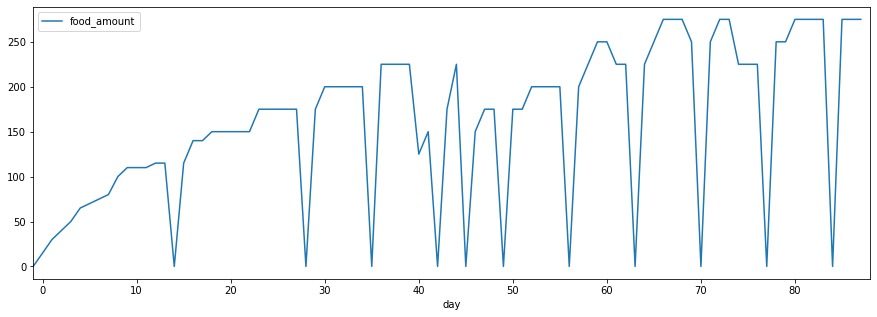

In [10]:
data[data.pool_id == 5].set_index('day')[['food_amount']].plot(figsize=(15, 5))

Al parecer el ciclo de engorde para esa psicina no llega 90 días. Posiblemente el valor nulo esté en el último día (día 88).

In [11]:
data[data.pool_id == 5].day.max()

88

Efectivamente, el último día es el 88.

Por lo observado en la serie de tiempo, los valores más altos en cada subida suelen mantenerse por más de 1 día (lo que se observa como líneas rectas horizontales en las 'cúspides'). Si a eso se agrega que los días 85, 86 y 87 ya forman esa línea recta, se decide asignar ese mismo valor para el día 88.

Se reemplaza el valor del registro 400, por el valor del registro 399.

In [12]:
data.loc[400, 'food_amount'] = data.loc[399, 'food_amount']

**Corrigiendo punto 3...**

In [13]:
data[data.shrimp_grown.isnull()]

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
868,2019-07-29,10,1,0.9800,914046,NaN,0.0,50.0,NW 38 % # 3,Boleo
869,2019-07-30,10,2,0.9775,911714,NaN,0.0,50.0,NW 38 % # 3,Boleo
870,2019-07-31,10,3,0.9750,909382,NaN,0.0,60.0,NW 38 % # 3,Boleo


El problema lo tiene la piscina 10 y ocurre en los 3 primeros días del ciclo.

Veámos qué pasa en el día -1 y qué pasa en el día 4.

In [14]:
data.loc[867:871, ['day', 'shrimp_grown']]

,day,shrimp_grown
867,-1,0.20
868,1,NaN
869,2,NaN
870,3,NaN
871,4,0.55


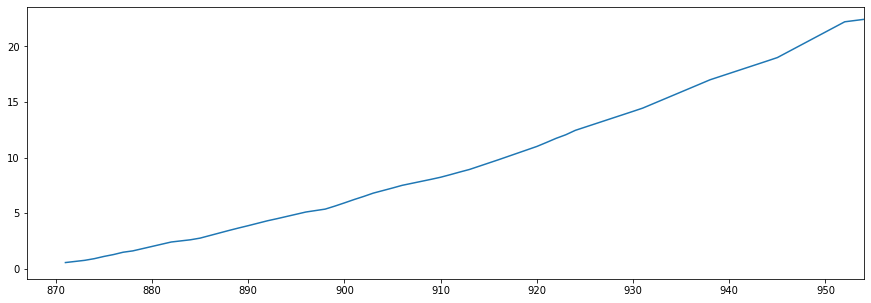

In [15]:
data[data.pool_id == 10]['shrimp_grown'].plot(figsize=(15, 5))

Como se esperaba, el crecimiento es bastante gradual, así que los datos que se asignen a los valores nulos deben respetar ese comportamiento.

In [16]:
data.loc[867:871, ['day', 'shrimp_grown']]

,day,shrimp_grown
867,-1,0.20
868,1,NaN
869,2,NaN
870,3,NaN
871,4,0.55


Al registro central (registro 869, día 2) se le asignará el promedio de los registros extremos (registros 867 y 871 o días -1 y 4).

In [17]:
data.loc[869, 'shrimp_grown'] = data.loc[[867, 871], 'shrimp_grown'].mean().round(2)

In [18]:
data.loc[867:871, ['day', 'shrimp_grown']]

,day,shrimp_grown
867,-1,0.20
868,1,NaN
869,2,0.38
870,3,NaN
871,4,0.55


Al registro 868 se le asignará el promedio de sus adjacentes (867 y 869).

Al registro 870 se le asignará el promedio de sus adjacentes (869 y 871).

In [19]:
data.loc[868, 'shrimp_grown'] = data.loc[[867, 869], 'shrimp_grown'].mean().round(2)
data.loc[870, 'shrimp_grown'] = data.loc[[869, 871], 'shrimp_grown'].mean().round(2)

In [20]:
data.loc[867:871, ['day', 'shrimp_grown']]

,day,shrimp_grown
867,-1,0.20
868,1,0.29
869,2,0.38
870,3,0.46
871,4,0.55


:)

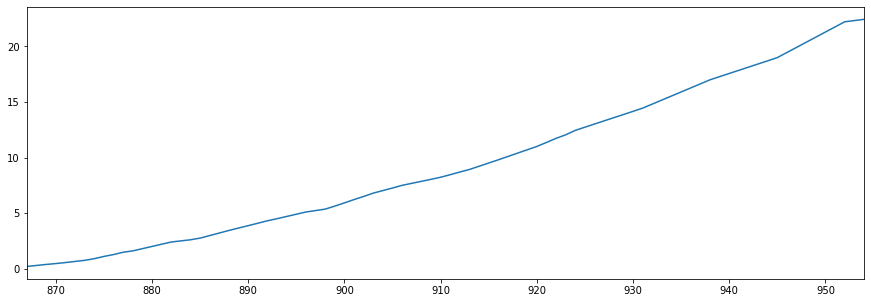

In [21]:
data[data.pool_id == 10]['shrimp_grown'].plot(figsize=(15, 5))

:)

Revisemos si las variables categóricas tienen valores extraños.

In [22]:
data.pool_id.unique()

array([2, 3, 4, 5, 6, 7, 8, 11, 9, 10], dtype=object)

In [23]:
data.feeder_type.unique()

array([nan, 'Boleo', 'Boleo/Platos', 'AA/platos'], dtype=object)

In [24]:
data.food_type.unique()

array([nan, 'NW 38 % # 3', 'NW 35 % # 4', 'OPL 35 % # 5', '2.34'],
      dtype=object)

'2.34' parece un valor extraño en comparación con el resto.

Revisemos en cuántos y cuáles registros aparece.

In [25]:
data[data.food_type == '2.34']

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
797,2019-08-13,9,19,0.92,410504,2.66,1091.94064,100.0,2.34,AA/platos


En 950 registros y 10 piscinas, este tipo de comida aparece solo 1 vez. Muy problablemente es un error humano al registrar la información.

In [26]:
data.iloc[790:805]

,date,pool_id,day,shrimp_survival_proportion,shrimp_population,shrimp_grown,shrimp_biomass,food_amount,food_type,feeder_type
790,2019-08-06,9,12,0.9525,425005,1.45,616.257975,90.0,NW 35 % # 4,Boleo/Platos
791,2019-08-07,9,13,0.9500,423890,1.60,678.224000,90.0,NW 35 % # 4,Boleo/Platos
792,2019-08-08,9,14,0.9450,421659,1.86,784.285740,90.0,NW 35 % # 4,Boleo/Platos
793,2019-08-09,9,15,0.9400,419428,2.02,847.244560,100.0,OPL 35 % # 5,AA/platos
794,2019-08-10,9,16,0.9350,417197,2.18,909.489460,100.0,OPL 35 % # 5,AA/platos
795,2019-08-11,9,17,0.9300,414966,2.34,971.020440,0.0,OPL 35 % # 5,AA/platos
796,2019-08-12,9,18,0.9250,412735,2.50,1031.837500,100.0,OPL 35 % # 5,AA/platos
797,2019-08-13,9,19,0.9200,410504,2.66,1091.940640,100.0,2.34,AA/platos
798,2019-08-14,9,20,0.9150,408273,2.82,1151.329860,100.0,OPL 35 % # 5,AA/platos
799,2019-08-15,9,21,0.9100,406042,2.98,1210.005160,100.0,OPL 35 % # 5,AA/platos


Según sus registros adjacentes, ese valor de 'food_type' debería ser 'OPL 35 % # 5'.

In [27]:
data.loc[797, 'food_type'] = data.loc[796, 'food_type']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
date                          955 non-null datetime64[ns]
pool_id                       955 non-null object
day                           955 non-null int64
shrimp_survival_proportion    955 non-null float64
shrimp_population             955 non-null int64
shrimp_grown                  955 non-null float64
shrimp_biomass                955 non-null float64
food_amount                   955 non-null float64
food_type                     945 non-null object
feeder_type                   945 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 74.7+ KB


Data limpia :)

In [29]:
data.to_pickle('shrimps')